# **VoxCity Demo**

You can easily learn how the Python package "VoxCity" works by following this demo.

Please execute cells from Step 1 to Step 5 by clicking the ▶️ icons.

It is important to note that you need to choose either Option 1 or Option 2 in Step 2 and execute only one.

# Step1. Prepare environment

In [ ]:
#@title Install voxcity
!pip install voxcity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 4.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mapbox-vector-tile to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.5/459.5 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 99.8 MB/s eta 0:00:00
 

In [ ]:
#@title Authenticate Google Earth Engine (Click link, generate token, copy and paste the token)
!earthengine authenticate --auth_mode=notebook

Authenticate: Limited support in Colab. Use ee.Authenticate() or --auth_mode=notebook instead.
W0128 22:33:37.811214 139368764748416 _default.py:683] No project ID could be determined. Consider running `gcloud config set project` or setting the GOOGLE_CLOUD_PROJECT environment variable
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/cloud-platform%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=fWe8HIQ8SCHT15TpTnybvgr56cRTqWjAU0Z8f7Rdnqs&tc=iMCv7n3H3rfVFfAH1nbNxSj4F-afbj4mePDP6OlHIvQ&cc=eU_vufPHWtY4OuXfFAUb_gFwx8Vb3zfq5TczR2OjsOQ

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1ASVgi3L-Fa5vO7pl3TzPa1h4pTZz

In [1]:
#@title Authenticate Google Earth Engine on local environment (Click link, generate token, copy and paste the token)
!earthengine authenticate

import ee
ee.Authenticate()
ee.Initialize(project='your_project')

Authenticate: Credentials already exist.  Use --force to refresh.


# Step2. Set target area by a rectangle

In [2]:
#@title Set target city (you need to fill in required values before executing!)
cityname = "new york" #@param {type:"string"}

## Option1 Set coordinates of vertices

In [ ]:
rectangle_vertices = [
    (-74.02034270713835, 40.69992881162822),  # Southwest corner (longitude, latitude)
    (-74.02034270713835, 40.7111851828668),   # Northwest corner (longitude, latitude)
    (-74.00555129286164, 40.7111851828668),   # Northeast corner (longitude, latitude)
    (-74.00555129286164, 40.69992881162822)   # Southeast corner (longitude, latitude)
]

## Option2 Draw a rectangle directly

In [3]:
#@title Draw a rectangle on a map (Click ■ on the left side, then click the north west corner and the south east corner of the rectangle.)
from voxcity.geoprocessor.draw import draw_rectangle_map_cityname

m, rectangle_vertices = draw_rectangle_map_cityname(cityname, zoom=15)
m

Map(center=[40.7127281, -74.0060152], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

## Option3 Set the center location and the width [m] (east-west) and height [m] (nort-south)

In [4]:
#@title Set width (m) and height (m) (you need to fill in required values before executing!)
width = 1250 #@param {type:"number"}
height = 1250 #@param {type:"number"}

In [5]:
#@title Draw a center point (circlemarker) on a map (Click ○ on the left side and then click the center location on the map.)
from voxcity.geoprocessor.draw import center_location_map_cityname

m, rectangle_vertices = center_location_map_cityname(cityname, width, height, zoom=15)
m

Map(center=[40.7127281, -74.0060152], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

Point drawn at Longitude: -74.012959, Latitude: 40.705622
Rectangle vertices:
Longitude: -74.02035471432862, Latitude: 40.69999381169179
Longitude: -74.02035471432862, Latitude: 40.71125018280321
Longitude: -74.00556328567137, Latitude: 40.71125018280321
Longitude: -74.00556328567137, Latitude: 40.69999381169179


# Step3 Set variables

In [9]:
#@title Set data sources and meshsize (m)
building_source = 'OpenStreetMap' #@param ['OpenStreetMap', 'Overture', 'EUBUCCO v0.1', 'Open Building 2.5D Temporal', 'Microsoft Building Footprints', 'OpenMapTiles', 'Local file']
building_complementary_source = "None" #@param ['None', 'Open Building 2.5D Temporal', 'Microsoft Building Footprints', 'OpenMapTiles', 'Local file', 'OpenStreetMap', 'Overture', 'EUBUCCO v0.1']
land_cover_source = 'OpenStreetMap' #@param ['OpenStreetMap', 'Urbanwatch', 'OpenEarthMapJapan', 'ESA WorldCover', 'ESRI 10m Annual Land Cover', 'Dynamic World V1']
canopy_height_source = 'High Resolution 1m Global Canopy Height Maps' #@param ['High Resolution 1m Global Canopy Height Maps', 'ETH Global Sentinel-2 10m Canopy Height (2020)']
dem_source = 'USGS 3DEP 1m' #@param ['DeltaDTM', 'FABDEM', 'England 1m DTM', 'DEM France 1m', 'AUSTRALIA 5M DEM', 'USGS 3DEP 1m', 'NASA', 'COPERNICUS', 'Flat']
meshsize = 5 #@param {type:"number"}

In [10]:
#@title Set optional parameters, data sources and meshsize (m)
kwargs = {
    # "building_path": 'path_to_building_source_file', #To set path to building base data source when you select 'Local file' as building_source.
    # "building_complementary_path": 'path_to_building_complemntary_source_file', #To set path to building complementary data source  when you select 'Local file' as building_complementary_source.
    "building_complementary_source": building_complementary_source,
    # "complement_polygon": True, #Set 'True' if you want to incorporate building footprints from building complementary source. Only building footprints that do not have any intersections with footprints from building source are included.
    "output_dir": 'output/test', #To set directory path for output files
    # "remove_perimeter_object": 0.1, #Set value more than 0 if you want to remove objects including buildings and trees near to domain boundarys (perimeter). Used mainly for CFD simulation. For instance, when you set 0.1, objects with distances from domain boundaries less than 0.1 * domain width (height) are removed.
    # "gridvis": True, #Set 'True' if you want to visualize extracted 2D grid data.
    # "mapvis": False, #Set 'True' if you want to visualize extracted 2D grid data on a basemap. Note that it take longer time than "gridvis".
    # "voxelvis": False, #Set 'True' if you want to visualize generated voxel 3d city model. Note that this visualiztion takes long time if the number of voxels is huge, e.g., more than one million.
    # "voxelvis_img_save_path": None, #Set path to save image file of generated voxel 3d city model.
    # "maptiler_API_key": 'your_API_key', #To set API key of Maptiler when you select 'OpenMapTilse' as building_source.
    # "trunk_height_ratio": None, #To set ratio of tree trunk height against tree canopy height. Default: 0.59 (11.76 / 19.98).
    # "min_canopy_height": None, #To set minimum canopy height in meters if you want to exclude trees lower than that height.
    "dem_interpolation": True, #Set 'True' when mesh size if finer than resolution of dem data source and if you want to use interporation.
    # "dynamic_world_date": '2021-04-02', #To set date of Dynamic World.
    # "esri_landcover_year": '2023' #To set year of Esri Land Cover.
}

# Step4 Get voxcity output

Creating Land Use Land Cover grid
 
Data source: OpenStreetMap
Fetching data from Overpass API...
Converting data to GeoJSON format...
Adjusted mesh size: (np.float64(4.999999999995544), np.float64(4.99957916626241))


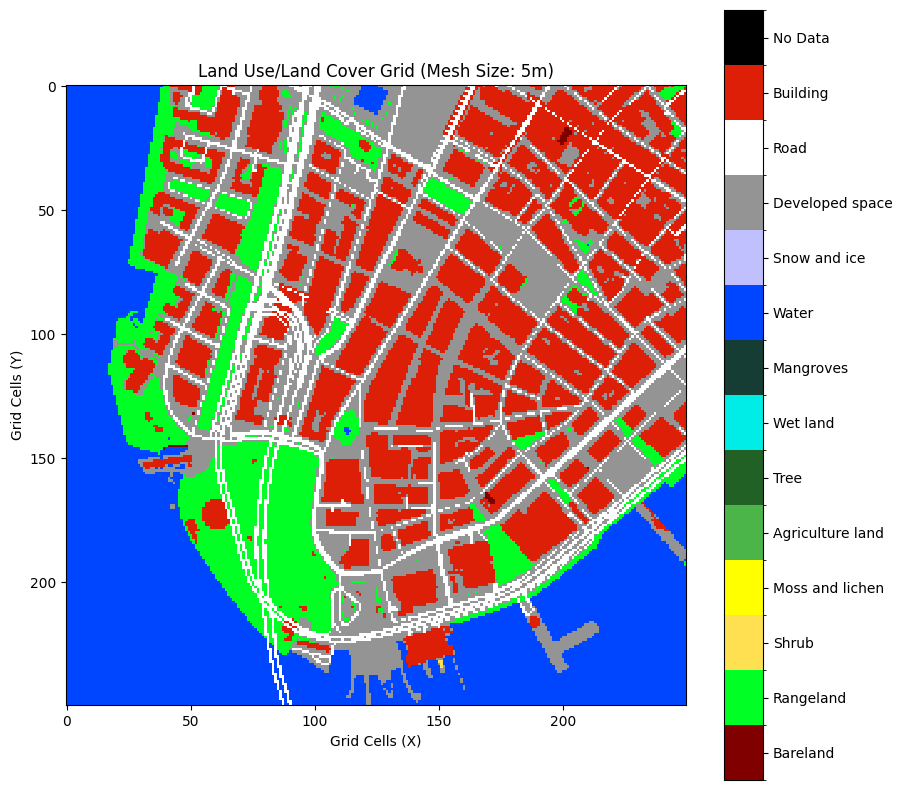

Creating Building Height grid
 
Data source: OpenStreetMap


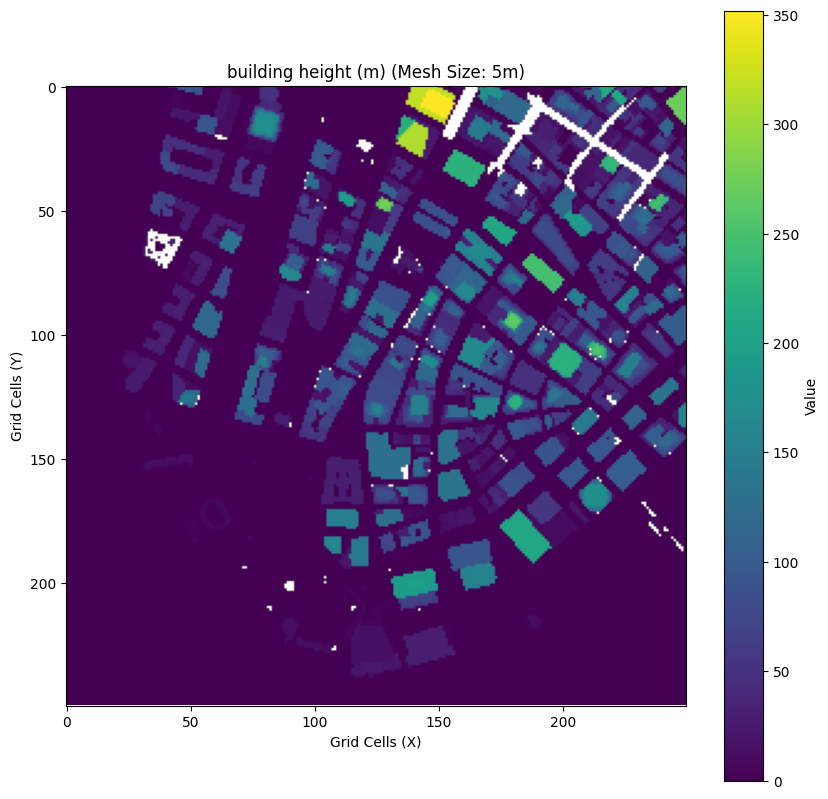

Creating Canopy Height grid
 
Data source: High Resolution Canopy Height Maps by WRI and Meta


2025-02-11 17:42:05,932 - INFO - HTTP Request: GET https://earthengine.googleapis.com/v1/projects/ee-kunihiko92150920research/maps/2a2177bf51db8396ed567e6a64c5561a-79105c63206f5ccafb6402f5eb1b5ae6/tiles/14/4823/6160 "HTTP/1.1 200 OK"
Reading input: c:\Users\kunih\OneDrive\00_Codes\python\VoxelCity\docs\output\test\canopy_height.tif

Updating dataset tags...
Writing output to: c:\Users\kunih\OneDrive\00_Codes\python\VoxelCity\docs\output\test\canopy_height.tif
2025-02-11 17:42:06,073 - INFO - GDAL signalled an error: err_no=1, msg='Deleting c:\\Users\\kunih\\OneDrive\\00_Codes\\python\\VoxelCity\\docs\\output\\test\\canopy_height.tif failed:\nPermission denied'


Downloaded image 1/1
Saving GeoTIFF. Please wait...
Image saved to output/test\canopy_height.tif


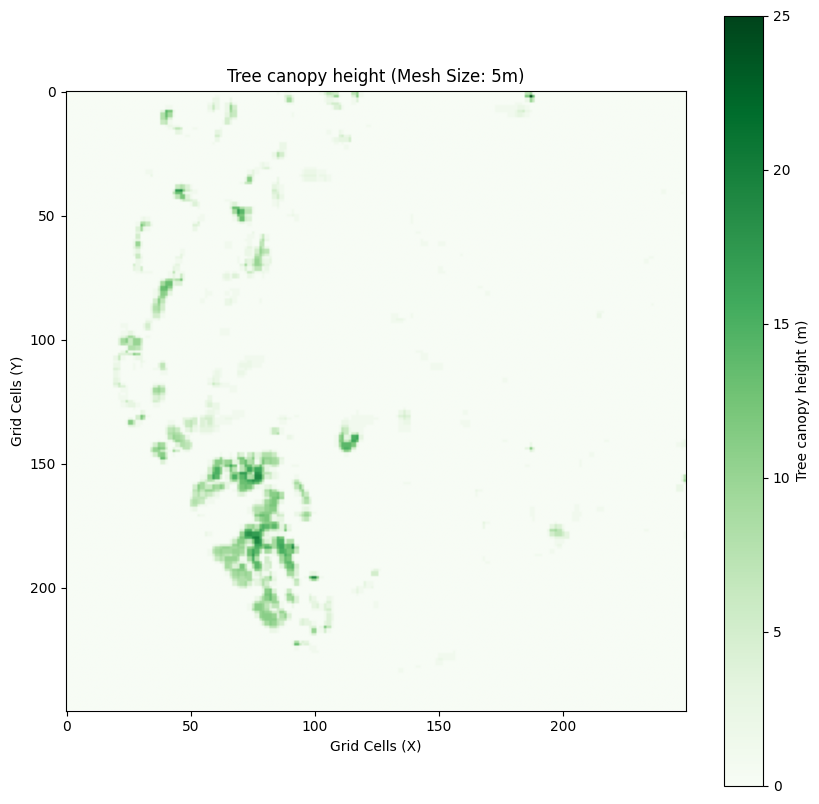

Creating Digital Elevation Model (DEM) grid
 
Data source: USGS 3DEP 1m
Generating URL ...
Please wait ...
Data downloaded to c:\Users\kunih\OneDrive\00_Codes\python\VoxelCity\docs\output\test\dem.tif


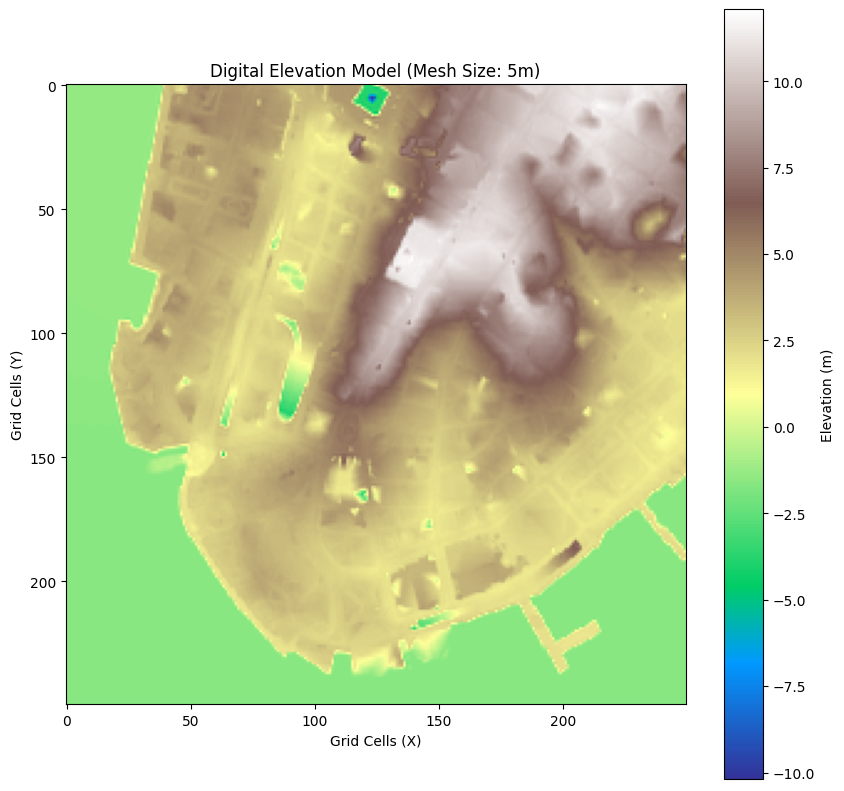

Generating 3D voxel data


In [11]:
#@title Obtain grid data integrate it to create voxel data
from voxcity.generator import get_voxcity

voxcity_grid, building_height_grid, building_min_height_grid, building_id_grid, canopy_height_grid, land_cover_grid, dem_grid, building_geojson = get_voxcity(
    rectangle_vertices,
    building_source,
    land_cover_source,
    canopy_height_source,
    dem_source,
    meshsize,
    **kwargs
)

# Step5 Export files

In [17]:
#@title Export INX file for ENVI-MET
from voxcity.exporter.envimet import export_inx, generate_edb_file

envimet_kwargs = {
    "output_directory": 'output/envimet', # To set directory path for output files
    "file_basename": 'voxcity', # To set directory path for output files
    "author_name": "enter your name", # Optional. To set author name in INX.
    "model_description": "generated and exported using VoxCity", # Optional. To desctibe model in INX.
    "domain_building_max_height_ratio": 2, # Optional. To set ratio between domain height (Z) and maximum height (building + terrain). Default: 2.0.
    "useTelescoping_grid": True, # Optional. To activate telescoping grid. Default: False.
    "verticalStretch": 20, # Optional. To set vertical stretch (%). Default: 0%.
    "min_grids_Z": 20, # Optional. To set minimum number of vertical grid cells (Z-axis). Default: 20.
    "lad": 1.0 # Optional. To set Leaf Area Density (LAD) of trees in m^-1. Default: 1.0 m^-1.
}

export_inx(
    building_height_grid,
    building_id_grid,
    canopy_height_grid,
    land_cover_grid,
    dem_grid,
    meshsize,
    land_cover_source,
    rectangle_vertices,
    **envimet_kwargs
)
generate_edb_file(**envimet_kwargs)

In [18]:
#@title VOX file for MagicaVoxel
from voxcity.exporter.magicavoxel import export_magicavoxel_vox

output_path = f"output/magicavoxel"
export_magicavoxel_vox(voxcity_grid, output_path)

Chunk 0_0_0 saved as output/magicavoxel/chunk_0_0_0.vox
Shape: (250, 75, 250)
	vox files was successfully exported in output/magicavoxel


In [19]:
#@title OBJ file
from voxcity.exporter.obj import export_obj

output_directory = './output/obj'
output_file_name = 'voxcity'

export_obj(voxcity_grid, output_directory, output_file_name, meshsize)

OBJ and MTL files have been generated in ./output/obj with the base name "voxcity".


# Step6 Use cases

Fetching weather station data from Climate.OneBuilding.Org...
Scanning Africa...
Found 3253 stations in Africa
Scanning Asia...
Found 7471 stations in Asia
Scanning Japan...
Found 157 stations in Japan
Scanning India...
Found 6 stations in India
Scanning Argentina...
Found 16 stations in Argentina
Scanning Canada...
Found 3437 stations in Canada
Scanning USA...
Found 10696 stations in USA
Scanning Caribbean...
Found 1534 stations in Caribbean
Scanning Southwest_Pacific...
Found 4712 stations in Southwest_Pacific
Scanning Europe...
Found 12570 stations in Europe
Scanning Antarctica...
Found 342 stations in Antarctica

Total stations found: 44194


Downloaded EPW file for New.York-Downtown.Manhattan.Heli NY USA
Distance: 0.61 km
Station coordinates: -74.009, 40.701
WMO: 720553
Climate zone: 4A - Mixed - Humid
Data period: 2011-2018
Files saved:
- EPW: output\new.york-downtown.manhattan.heli_ny_usa_2.epw
- Metadata: output\new.york-downtown.manhattan.heli_ny_usa_2.json

Loading EPW data..

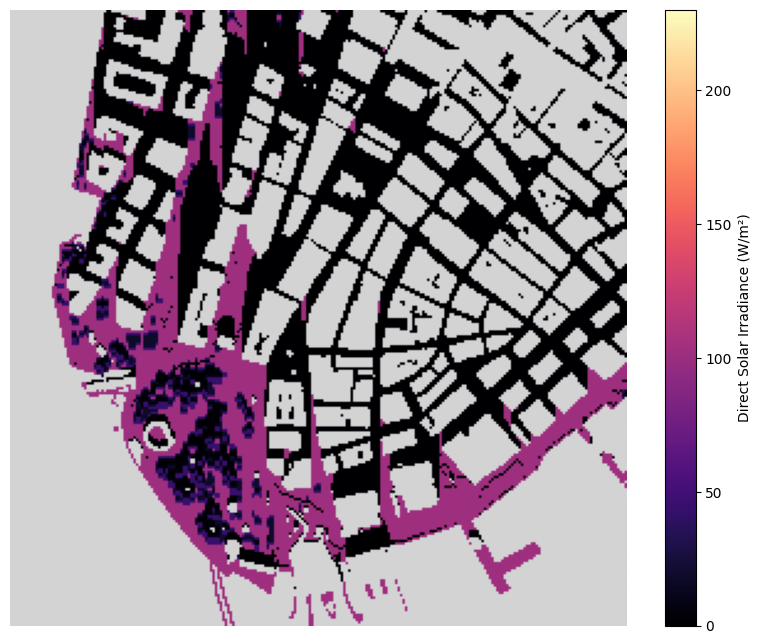

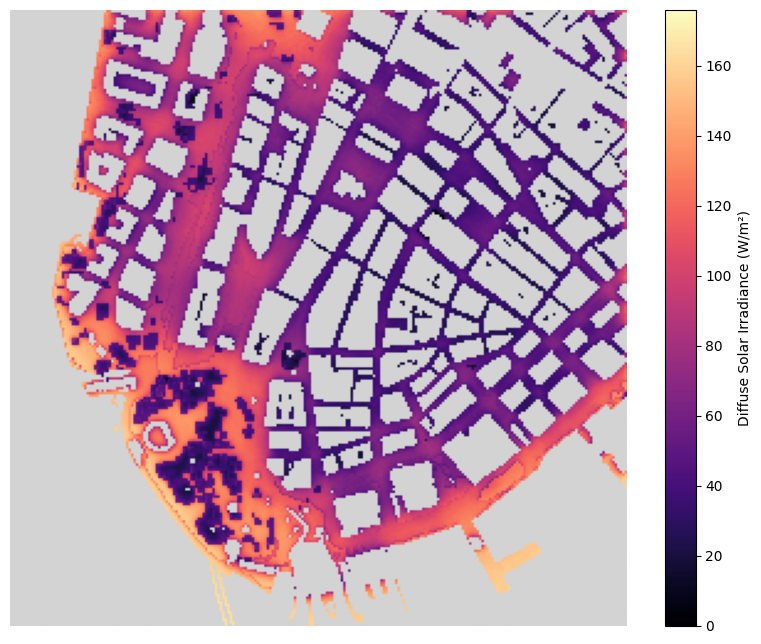

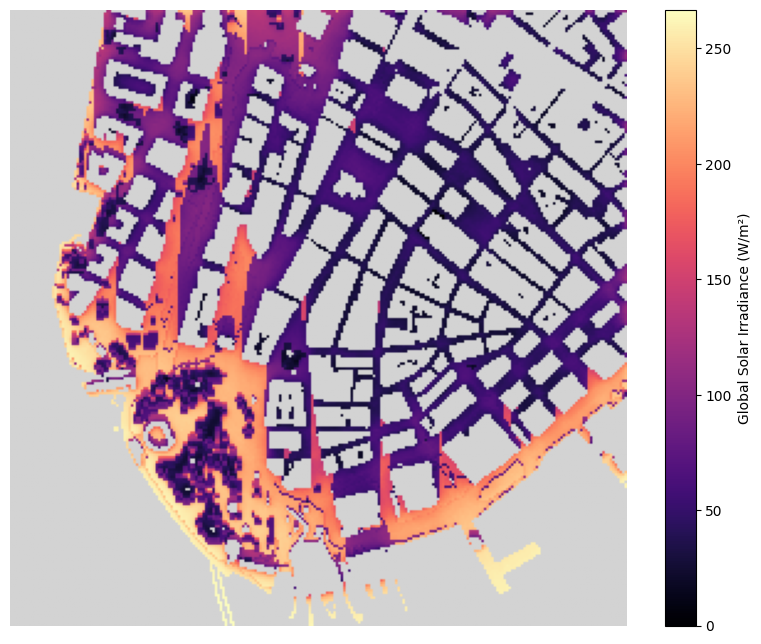

OBJ and MTL files have been generated in output/test with the base name "instantaneous_solar_irradiance".


In [28]:
#@title Simulation of solar irradiance (instantaneous)
from voxcity.simulator.solar import get_global_solar_irradiance_using_epw

solar_kwargs = {
    "download_nearest_epw": True,  # Whether to automatically download nearest EPW weather file based on location from Climate.OneBuilding.Org
    "rectangle_vertices": rectangle_vertices,  # Coordinates defining the area of interest for calculation
    # "epw_file_path": "./output/new.york-downtown.manhattan.heli_ny_usa_1.epw",  # Path to EnergyPlus Weather (EPW) file containing climate data. Set if you already have an EPW file.
    "calc_time": "01-01 12:00:00",  # Time for instantaneous calculation in format "MM-DD HH:MM:SS"
    "view_point_height": 1.5,  # Height of view point in meters for calculating solar access. Default: 1.5 m
    "tree_k": 0.6,    # Static extinction coefficient - controls how much sunlight is blocked by trees (higher = more blocking)
    "tree_lad": 0.5,    # Leaf area density of trees - density of leaves/branches that affect shading (higher = denser foliage)
    "dem_grid": dem_grid,      # Digital elevation model grid for terrain heights
    "colormap": 'magma',       # Matplotlib colormap for visualization. Default: 'viridis'
    "obj_export": True,        # Whether to export results as 3D OBJ file
    "output_directory": 'output/test',  # Directory for saving output files
    "output_file_name": 'instantaneous_solar_irradiance',  # Base filename for outputs (without extension)
    "alpha": 1.0,             # Transparency of visualization (0.0-1.0)
    "vmin": 0,               # Minimum value for colormap scaling in visualization
    # "vmax": 900,             # Maximum value for colormap scaling in visualization
}

# Compute global solar irradiance map (direct + diffuse radiation)
solar_grid = get_global_solar_irradiance_using_epw(
    voxcity_grid,                        # 3D voxel grid representing the urban environment
    meshsize,                            # Size of each voxel in meters
    calc_type='instantaneous',           # Calculate instantaneous irradiance at specified time
    direct_normal_irradiance_scaling=1.0, # Scaling factor for direct solar radiation (1.0 = no scaling)
    diffuse_irradiance_scaling=1.0,      # Scaling factor for diffuse solar radiation (1.0 = no scaling)
    **solar_kwargs                       # Pass all the parameters defined above
)

Fetching weather station data from Climate.OneBuilding.Org...
Scanning Africa...
Found 3253 stations in Africa
Scanning Asia...
Found 7471 stations in Asia
Scanning Japan...
Found 157 stations in Japan
Scanning India...
Found 6 stations in India
Scanning Argentina...
Found 16 stations in Argentina
Scanning Canada...
Found 3437 stations in Canada
Scanning USA...
Found 10696 stations in USA
Scanning Caribbean...
Found 1534 stations in Caribbean
Scanning Southwest_Pacific...
Found 4712 stations in Southwest_Pacific
Scanning Europe...
Found 12570 stations in Europe
Scanning Antarctica...
Found 342 stations in Antarctica

Total stations found: 44194


Downloaded EPW file for New.York-Downtown.Manhattan.Heli NY USA
Distance: 0.61 km
Station coordinates: -74.009, 40.701
WMO: 720553
Climate zone: 4A - Mixed - Humid
Data period: 2011-2018
Files saved:
- EPW: output\new.york-downtown.manhattan.heli_ny_usa_3.epw
- Metadata: output\new.york-downtown.manhattan.heli_ny_usa_3.json

Loading EPW data..

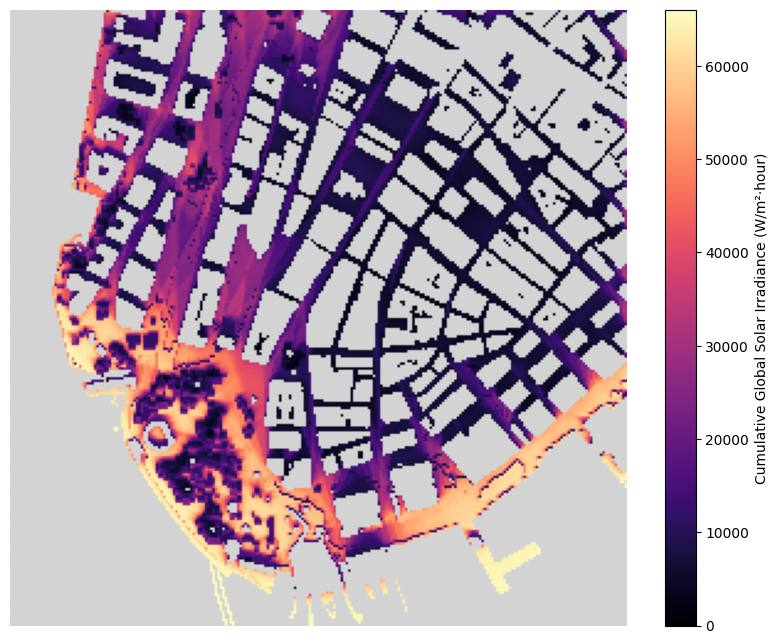

OBJ and MTL files have been generated in output/test with the base name "solar_irradiance".


In [29]:
#@title Simulation of solar irradiance (cumulative)
from voxcity.simulator.solar import get_global_solar_irradiance_using_epw

# Dictionary containing parameters for solar irradiance calculation
solar_kwargs = {
    "download_nearest_epw": True,  # Whether to automatically download nearest EPW weather file based on location from Climate.OneBuilding.Org
    "rectangle_vertices": rectangle_vertices,  # Coordinates defining the area of interest for calculation
    # "epw_file_path": "./output/USA_CA_Marina.Muni.AP.690070_TMYx.epw",  # Path to EnergyPlus Weather (EPW) file containing climate data. Set if you already have an EPW file.
    "start_time": "01-01 01:00:00",  # Start time for cumulative calculation
    "end_time": "01-31 23:00:00",    # End time for cumulative calculation
    "view_point_height": 1.5,  # Height of view point in meters for calculating solar access. Default: 1.5 m
    "tree_k": 0.6,    # Static extinction coefficient - controls how much sunlight is blocked by trees (higher = more blocking)
    "tree_lad": 0.5,    # Leaf area density of trees - density of leaves/branches that affect shading (higher = denser foliage)
    "dem_grid": dem_grid,      # Digital elevation model grid for terrain heights
    "colormap": 'magma',       # Matplotlib colormap for visualization. Default: 'viridis'
    "obj_export": True,        # Whether to export results as 3D OBJ file
    "output_directory": 'output/test',  # Directory for saving output files
    "output_file_name": 'solar_irradiance',  # Base filename for outputs (without extension)
    "alpha": 1.0,             # Transparency of visualization (0.0-1.0)
    "vmin": 0,               # Minimum value for colormap scaling in visualization (commented out to auto-scale)
    # "vmax": 900,           # Maximum value for colormap scaling in visualization (commented out to auto-scale)
}

# Calculate cumulative solar irradiance over the specified time period
cum_solar_grid = get_global_solar_irradiance_using_epw(
    voxcity_grid,                        # 3D voxel grid representing the urban environment
    meshsize,                            # Size of each voxel in meters
    calc_type='cumulative',              # Calculate cumulative irradiance over time period instead of instantaneous
    direct_normal_irradiance_scaling=1.0, # Scaling factor for direct solar radiation (1.0 = no scaling)
    diffuse_irradiance_scaling=1.0,      # Scaling factor for diffuse solar radiation (1.0 = no scaling)
    **solar_kwargs                       # Pass all the parameters defined above
)

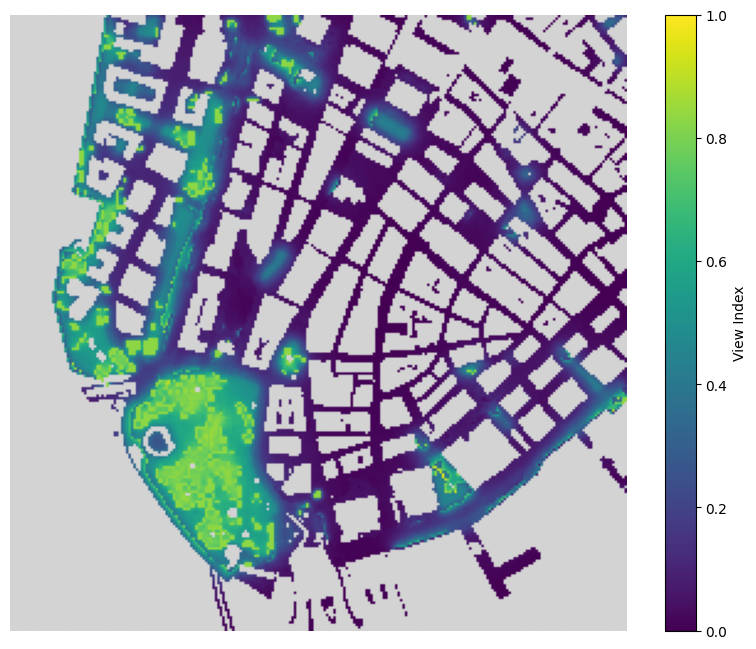

OBJ and MTL files have been generated in output with the base name "gvi".


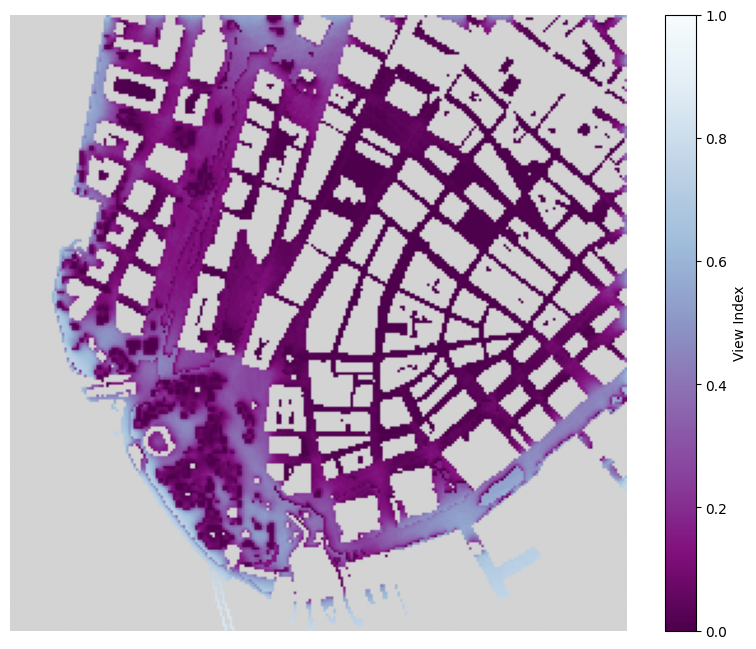

OBJ and MTL files have been generated in output with the base name "svi".


In [22]:
#@title Simulation of view index
from voxcity.simulator.view import get_view_index

view_kwargs = {
    "view_point_height": 1.5,      # Height of observer viewpoint in meters
    "tree_k": 0.6,                 # Static extinction coefficient - controls how much sunlight is blocked by trees (higher = more blocking)
    "tree_lad": 1.0,               # Leaf area density of trees - density of leaves/branches that affect shading (higher = denser foliage)
    "dem_grid": dem_grid,          # Digital elevation model grid
    "colormap": "viridis",         # Colormap for visualization
    "obj_export": True,            # Whether to export as OBJ file
    "output_directory": "output",  # Directory to save output files
    "output_file_name": "gvi"      # Base filename for outputs
}

# Compute Green View Index using mode='green'
gvi_grid = get_view_index(voxcity_grid, meshsize, mode='green', **view_kwargs)

# Adjust parameters for Sky View Index
view_kwargs["colormap"] = "BuPu_r"
view_kwargs["output_file_name"] = "svi"
view_kwargs["elevation_min_degrees"] = 0

# Compute Sky View Index using mode='sky'
svi_grid = get_view_index(voxcity_grid, meshsize, mode='sky', **view_kwargs)

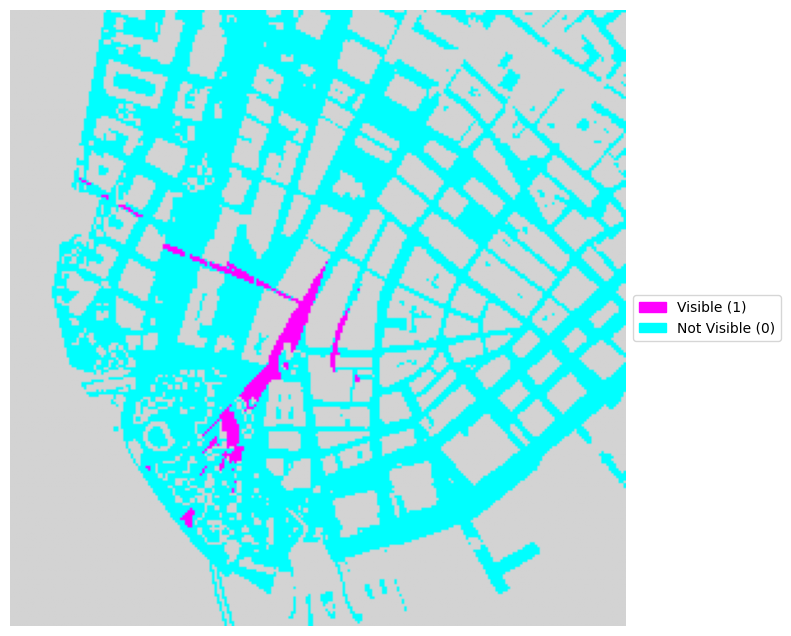

OBJ and MTL files have been generated in output/obj with the base name "landmark_visibility".
OBJ and MTL files have been generated in output/obj with the base name "voxcity_landmark_visibility".


In [23]:
#@title Simulation of landmark visibility

from voxcity.simulator.view import get_landmark_visibility_map

landmark_kwargs = {
    "view_point_height": 1.5, # To set height of view point in meters. Default: 1.5 m.
    "rectangle_vertices": rectangle_vertices,
    "dem_grid": dem_grid,
    "colormap": 'cool', # Choose a colormap.  Default: 'viridis'.
    "obj_export": True, # Set "True" if you export the result in an OBJ file.
    "output_directory": 'output/obj', # To set directory path for output files. Default: False.
    "output_file_name": 'landmark_visibility', # To set file name excluding extension. Default: 'view_index.
    "alpha": 1.0, # Set transparency (0.0 to 1.0)
    "vmin": 0.0, # Minimum value for colormap normalization
    "vmax": 1.0 # Maximum value for colormap normalization
}

landmark_vis_map, voxcity_grid_landmark = get_landmark_visibility_map(voxcity_grid, building_id_grid, building_geojson, meshsize, **landmark_kwargs)

In [24]:
#@title Map for drawing a polygon to specify landmark buildings - draw a polygon that includes all desired landmark building footprints
from voxcity.geoprocessor.draw import display_buildings_and_draw_polygon

# Create interactive map with buildings and get drawn polygon
m_landmark, landmark_polygon = display_buildings_and_draw_polygon(building_geojson)
m_landmark

Map(center=[40.70778185, -74.01203054999999], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom…

Vertices of the drawn polygon (Lon-Lat):
 - (lon, lat) = (-74.013358, 40.705634)
 - (lon, lat) = (-74.013412, 40.705065)
 - (lon, lat) = (-74.012618, 40.705008)
 - (lon, lat) = (-74.012457, 40.705415)


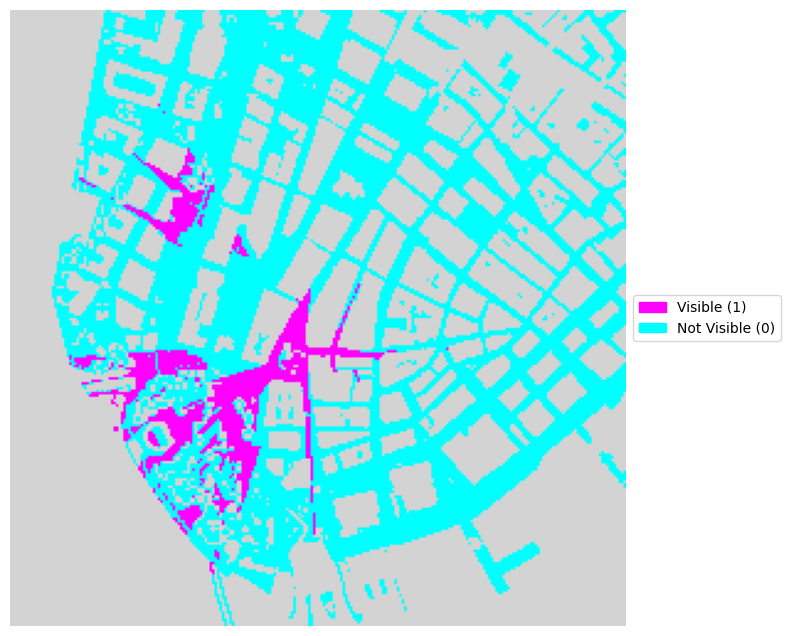

OBJ and MTL files have been generated in output/obj with the base name "landmark_visibility".
OBJ and MTL files have been generated in output/obj with the base name "voxcity_landmark_visibility".


In [26]:
from voxcity.simulator.view import get_landmark_visibility_map  # Import function to analyze landmark visibility from different viewpoints

# Configure parameters for landmark visibility analysis
landmark_kwargs["landmark_polygon"] = landmark_polygon # Polygon defining the landmark area drawn on the interactive map

landmark_vis_map, voxcity_grid_landmark = get_landmark_visibility_map(  # Calculate visibility map for landmarks
    voxcity_grid,                               # Input voxel grid representing the 3D urban environment
    building_id_grid,                           # Grid containing building IDs for each cell
    building_geojson,                           # GeoJSON containing building footprint data
    meshsize,                                   # Size of each grid cell in meters
    **landmark_kwargs                           # Pass all configuration parameters defined above
)

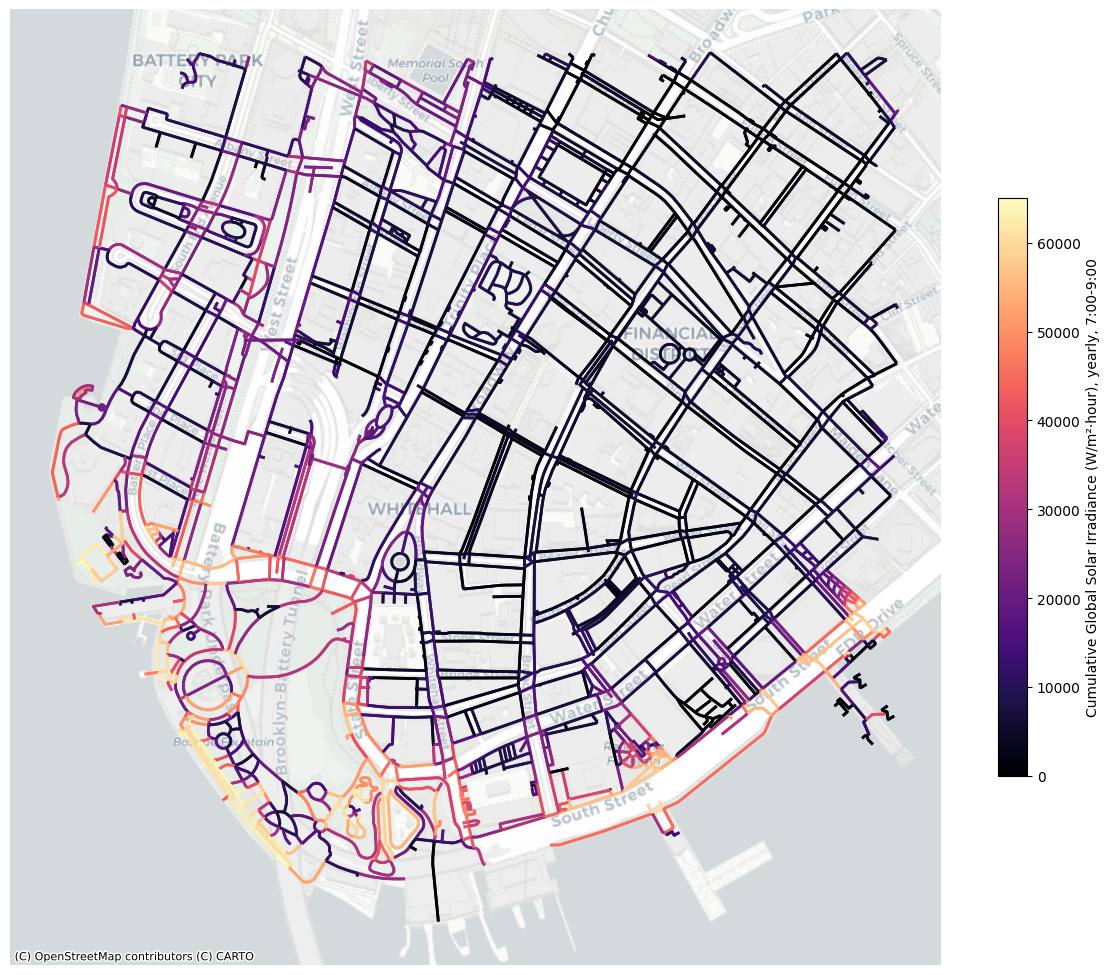

In [31]:
#@title Data aggregation by road networks
from voxcity.geoprocessor.network import get_network_values

network_kwargs = {
    "network_type": "walk",
    "colormap": "magma",
    "vis_graph": True,
    "vmin": 0.0,
    "vmax": 65000,
    "edge_width": 2,
    "alpha": 0.8,
    "zoom": 16
}

G, solar_edge_gdf = get_network_values(
    cum_solar_grid, 
    rectangle_vertices, 
    meshsize, 
    value_name='Cumulative Global Solar Irradiance (W/m²·hour), yearly, 7:00-9:00', 
    **network_kwargs
)